![This is an image](Quant-Trading.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')

from numpy import *
from pylab import *
from numpy.random import rand
import scipy.stats

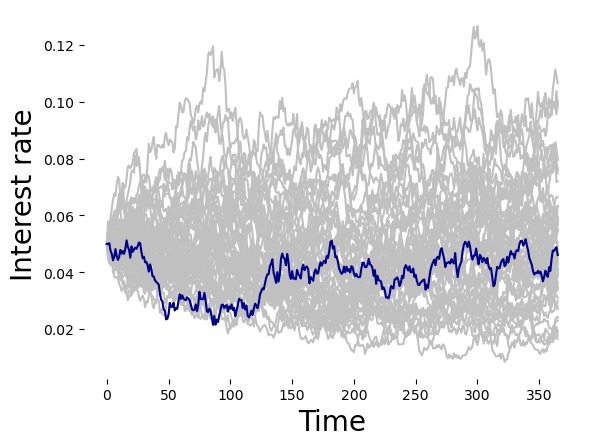

In [3]:
#Here we have the simulation of a Cox Ingersoll Ross - CIR process

    
ncx2inv = scipy.stats.distributions.ncx2.ppf                                     #Non Central Chi Square inverse function
M = 10**2                                                                        #Number of simulations
N = 365                                                                          #Number of time steps
T = 1                                                                            #Time to maturity
delta_t = T/N                                                                    #Time step
r0 = 0.05                                                                        #Initial r - interest rate
initial_r=r0*ones((M,1))                                                         #Initial r vector
r = zeros((M,N))                                                                 #Declaration of the interest rate matrix (r)
r = append(initial_r,r,axis=1) 

kappa = 2                                                                         #Mean reversion speed
theta = 0.05                                                                      #Long run mean
sigma = 0.2
d = 4*theta*kappa/sigma**2                                                        #Degrees of freedom
x = rand(M,N)
w = zeros((M,N))
lamda = zeros((M,N))


for i in range(0,N):
    coeff1 = 4*kappa
    coeff2 = (sigma**2)*(1-exp(-kappa*delta_t))
    coeff3 = exp(-kappa*delta_t)
    
    lamda[:,i] = r[:,i]*((coeff1*coeff3)/coeff2)                                 #Non central parameter according to the notes in Glasserman
    
    w[:,i] = ncx2inv(x[:,i],d,lamda[:,i])                                       #We generate a vector of non central chi squares
                                                                                #ncx2.ppf(prb, df, nc)-> df:degrees of freedom, nc:Non centrality parameter
    r[:,i+1]=(coeff2/coeff1)*w[:,i]

plt.plot(r[0:50,:].transpose(),c='silver')
plt.plot(r[0:1,:].transpose(),c='darkblue')
ylabel("Interest rate",fontsize=20)
xlabel("Time",fontsize=20)
box(on=None)
show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)